In [1]:
# Import all necessary libraries.
import numpy as np
from scipy.special import erfc
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Reset the PN sequence generator.
seed = 42
np.random.seed(seed)

In [3]:
# Number of BPSK symbols to be transmitted.
N = 100000

In [4]:
# Instantiate a Gaussian naive Bayes classifier.
gnb = GaussianNB()

In [5]:
# Create Es/N0 vector.
EsN0dB = 10

# Convert into linear value.
EsN0Lin = 10.0**(-(EsN0dB/10.0))
    
# Generate N BPSK symbols.
x = (2.0 * (np.random.rand(N) >= 0.5) - 1.0).reshape(N, 1)
    
# Generate noise vector. 
# Divide by two once the theoretical ber uses a complex Normal pdf with variance of each part = 1/2.
noise = np.sqrt(EsN0Lin/2.0)*np.random.randn(N, 1)
    
# Pass symbols through AWGN channel.
y = x + noise
    
# Split array into random train and test subsets.
x_test, x_train, y_test, y_train = train_test_split(x, y, random_state=42)
    
# Fit.
gnb.fit(y_train, x_train.ravel())

# Predict.
detected_x = gnb.predict(y_test).reshape(len(y_test), 1)

acc = accuracy_score(x_test, detected_x)
print('Acurácia:',acc)

Acurácia: 1.0


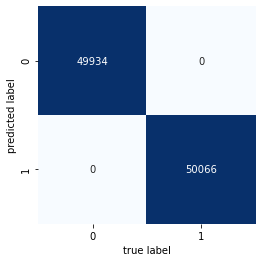

In [6]:
# Plot the confusion matrix
x_pred = gnb.predict(y)

fig = plt.figure()
mat = confusion_matrix(x, x_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [7]:
# Number of BPSK symbols to be transmitted.
N = 1000000

In [8]:
# Create Es/N0 vector.
EsN0dB = np.arange(-10,12,2)

ber_theo = ber_simu = np.zeros(len(EsN0dB))
for idx in range(0,len(EsN0dB)):
    
    print('Es/N0 dB:', EsN0dB[idx])
    
    EsN0Lin = 10.0**(-(EsN0dB[idx]/10.0))
    
    # Generate N BPSK symbols.
    x = (2.0 * (np.random.rand(N) >= 0.5) - 1.0).reshape(N, 1)
    
    # Generate noise vector. 
    # Divide by two once the theoretical ber uses a complex Normal pdf with variance of each part = 1/2.
    noise = np.sqrt(EsN0Lin/2.0)*np.random.randn(N, 1)
    
    # Pass symbols through AWGN channel.
    y = x + noise
    
    # Predict.
    detected_x = gnb.predict(y).reshape(len(y), 1)
    
    # Simulated BPSK BER.
    error = (x != detected_x).sum()
    ber_simu[idx] = 1.0 * error / len(y)
    
    # Theoretical BPSK BER.
    ber_theo[idx] = 0.5*erfc(np.sqrt(10.0**((EsN0dB[idx]/10.0))))

Es/N0 dB: -10
Es/N0 dB: -8
Es/N0 dB: -6
Es/N0 dB: -4
Es/N0 dB: -2
Es/N0 dB: 0
Es/N0 dB: 2
Es/N0 dB: 4
Es/N0 dB: 6
Es/N0 dB: 8
Es/N0 dB: 10


In [9]:
# Print Es/N0 versus BER values.
for i in range(0,len(ber_simu)): print('Es/N0:%d \t- BER: %e' % (EsN0dB[i], ber_simu[i]))

Es/N0:-10 	- BER: 3.273604e-01
Es/N0:-8 	- BER: 2.867145e-01
Es/N0:-6 	- BER: 2.392287e-01
Es/N0:-4 	- BER: 1.861138e-01
Es/N0:-2 	- BER: 1.306445e-01
Es/N0:0 	- BER: 7.864960e-02
Es/N0:2 	- BER: 3.750613e-02
Es/N0:4 	- BER: 1.250082e-02
Es/N0:6 	- BER: 2.388291e-03
Es/N0:8 	- BER: 1.909078e-04
Es/N0:10 	- BER: 3.872108e-06


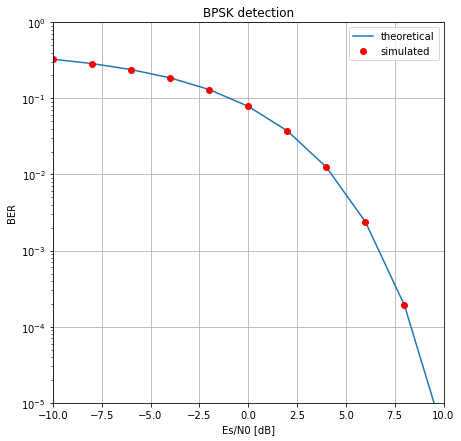

In [10]:
# Plot Es/N0 versus BER values.
fig = plt.figure(figsize=(7,7))
plt.plot(EsN0dB, ber_theo, label='theoretical')
plt.plot(EsN0dB, ber_simu, 'ro', label='simulated')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Es/N0 [dB]')
plt.ylabel('BER')
plt.grid(True)
plt.title('BPSK detection')
plt.legend()
plt.xlim([-10, 10])
plt.ylim([1e-5, 1])
plt.savefig("bpsk_ber_curves.png", dpi=600)
plt.show()